In [2]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

from networkx.algorithms.community import greedy_modularity_communities
import numpy as np
import zipfile


Lettura files

In [3]:
# Carica il file dei dati
data = pd.read_csv('soc-dolphins.txt', delimiter=' ', header=None, names=['src', 'target'])

# Crea un grafo vuoto (grafo non diretto, se vuoi un grafo diretto usa nx.DiGraph())
G = nx.Graph()

# Aggiungi i nodi e gli archi
for index, row in data.iterrows():
    G.add_node(row['src'], type='src')  # Aggiungi il delfino come nodo
    G.add_node(row['target'], type='target')  # Aggiungi il gruppo come nodo
    G.add_edge(row['src'], row['target'])  # Crea un arco tra il delfino e il gruppo

# Visualizzare i nodi e gli archi
print("Nodi:", G.nodes(data=True))
print("Archi:", G.edges())


Nodi: [(11, {'type': 'target'}), (1, {'type': 'target'}), (15, {'type': 'target'}), (16, {'type': 'target'}), (41, {'type': 'target'}), (43, {'type': 'target'}), (48, {'type': 'src'}), (18, {'type': 'target'}), (2, {'type': 'target'}), (20, {'type': 'target'}), (27, {'type': 'target'}), (28, {'type': 'src'}), (29, {'type': 'target'}), (37, {'type': 'target'}), (42, {'type': 'target'}), (55, {'type': 'target'}), (3, {'type': 'target'}), (45, {'type': 'src'}), (62, {'type': 'src'}), (9, {'type': 'target'}), (4, {'type': 'target'}), (60, {'type': 'src'}), (52, {'type': 'target'}), (5, {'type': 'target'}), (10, {'type': 'target'}), (6, {'type': 'target'}), (14, {'type': 'target'}), (57, {'type': 'src'}), (58, {'type': 'src'}), (7, {'type': 'target'}), (8, {'type': 'target'}), (31, {'type': 'target'}), (21, {'type': 'target'}), (38, {'type': 'target'}), (46, {'type': 'target'}), (33, {'type': 'target'}), (30, {'type': 'target'}), (12, {'type': 'target'}), (34, {'type': 'target'}), (13, {'ty

In [4]:
def analizza_grafo(G: nx.Graph):
    # Numero di nodi
    n_nodi = G.number_of_nodes()
    # Numero di archi
    n_archi = G.number_of_edges()
    # Densità
    densita = nx.density(G)
    # Connessione
    connesso = nx.is_connected(G)
    
    # Se il grafo è connesso, calcolo raggio, diametro e periferia
    if connesso:
        raggio = nx.radius(G)
        diametro = nx.diameter(G)
        periferia = list(nx.periphery(G))
    else:
        raggio = None
        diametro = None
        periferia = None
    
    # Average clustering coefficient
    clustering_medio = nx.average_clustering(G)
    
    # Stampa dei risultati
    print(f"Numero di nodi: {n_nodi}")
    print(f"Numero di archi: {n_archi}")
    print(f"Densità: {densita:.4f}")
    print(f"Connesso: {connesso}")
    
    if connesso:
        print(f"Raggio: {raggio}")
        print(f"Diametro: {diametro}")
        print(f"Periferia: {periferia}")
    else:
        print("Raggio, diametro e periferia non definiti su grafo non connesso.")
    
    print(f"Average clustering coefficient: {clustering_medio:.4f}")


    
    

In [5]:
analizza_grafo(G)

Numero di nodi: 62
Numero di archi: 159
Densità: 0.0841
Connesso: True
Raggio: 5
Diametro: 8
Periferia: [5, 12, 36, 61, 50, 59, 47, 54]
Average clustering coefficient: 0.2590


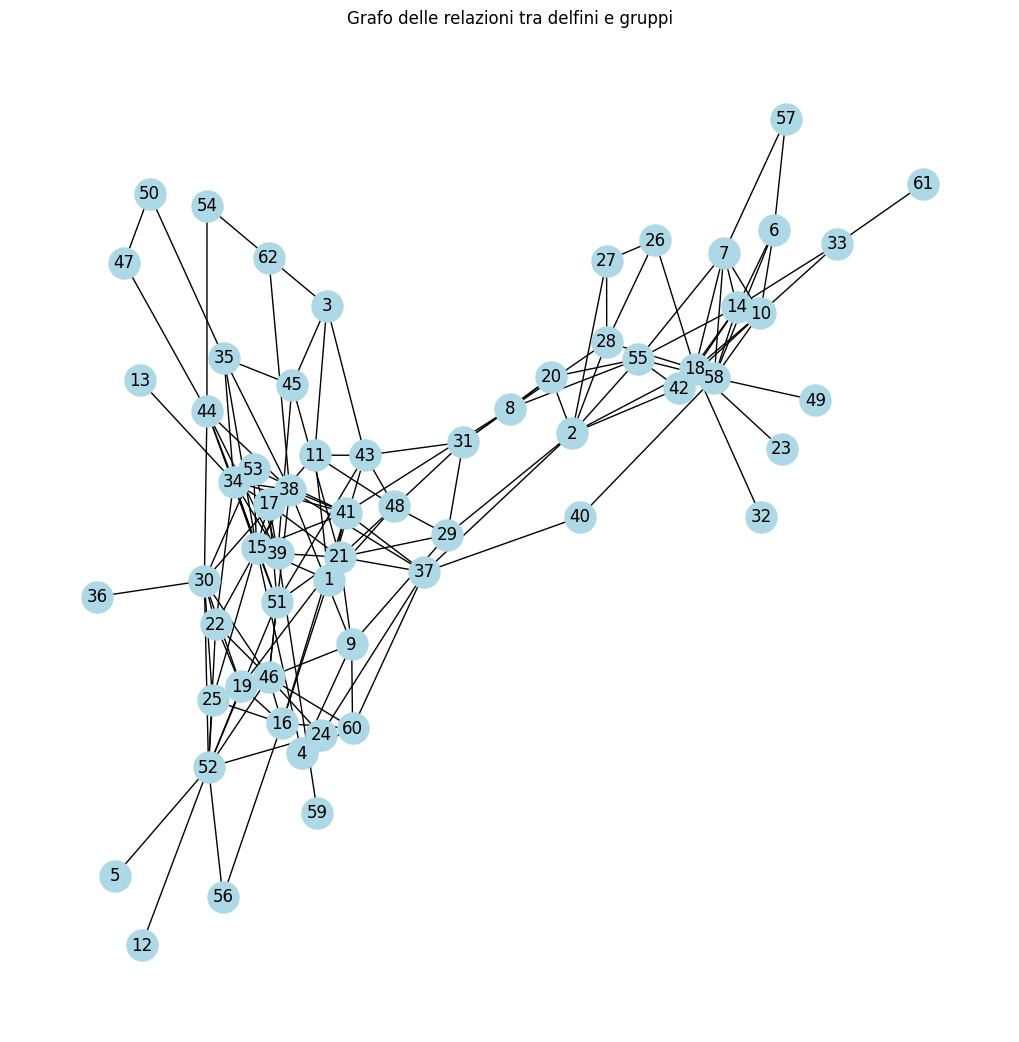

In [6]:
# Visualizzazione spring
pos = nx.spring_layout(G)

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
plt.title("Grafo delle relazioni tra delfini e gruppi")
plt.show()

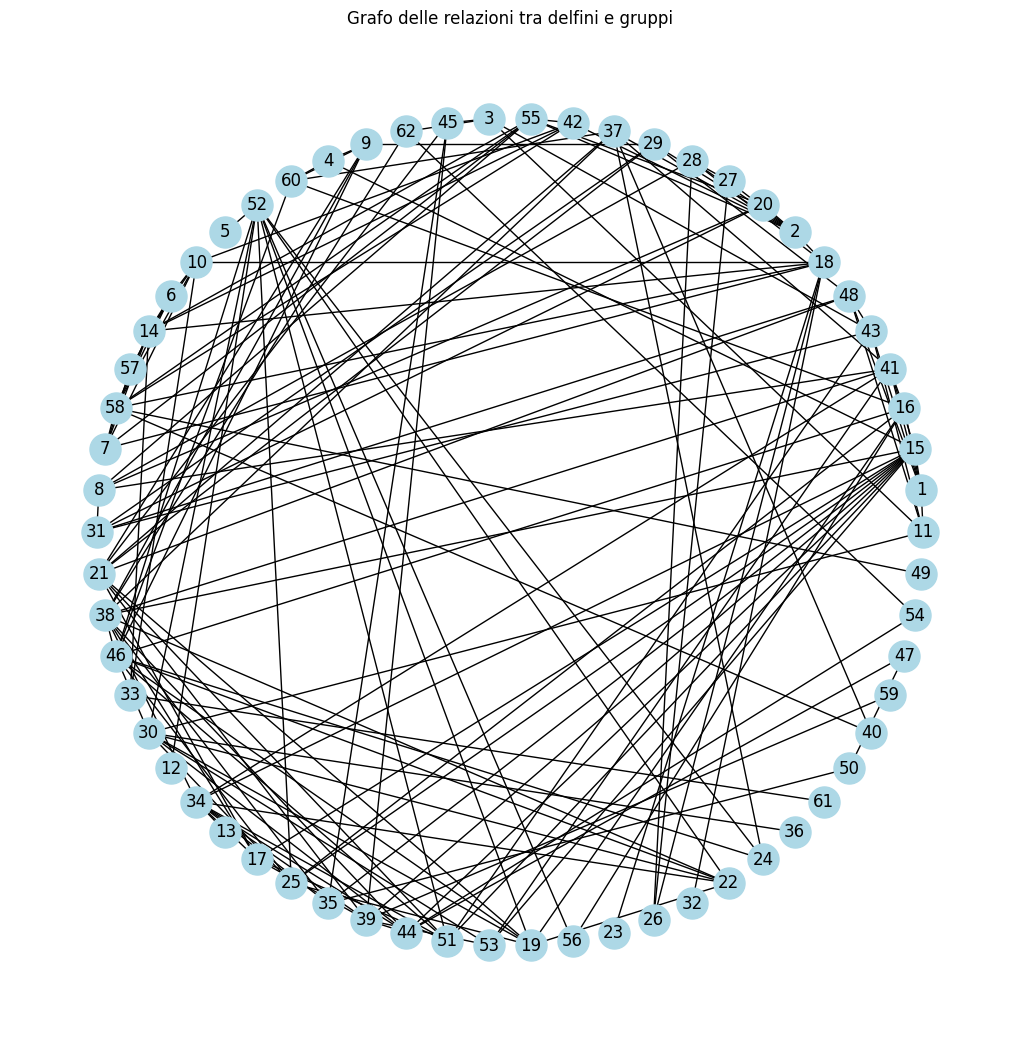

In [7]:
# Visualizzazione spiral
pos = nx.circular_layout(G)

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
plt.title("Grafo delle relazioni tra delfini e gruppi")
plt.show()

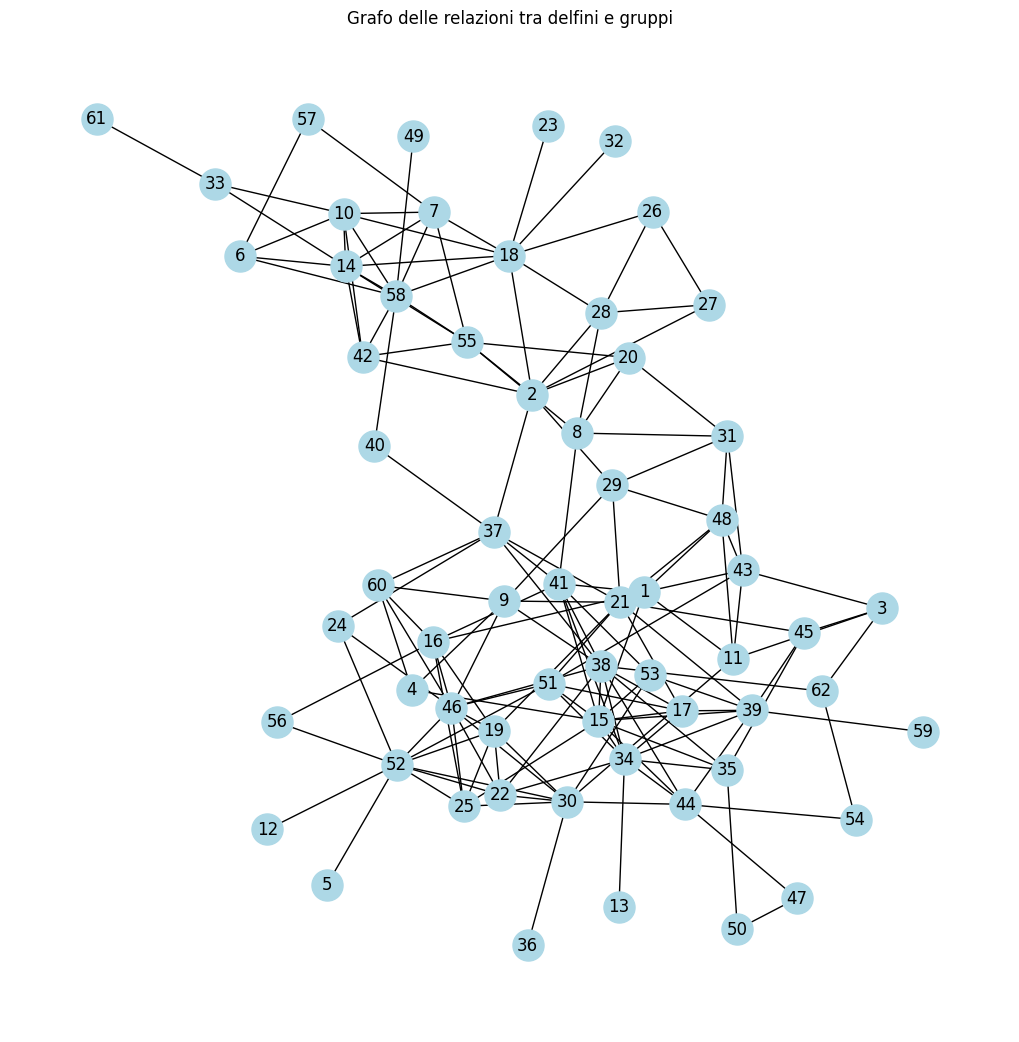

In [8]:
# Visualizzazione kamada-kawai
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
plt.title("Grafo delle relazioni tra delfini e gruppi")
plt.show()

## ANALISI DELLE CENTRALITY

In [9]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)


In [10]:
centrality_df = pd.DataFrame({
    "Node": list(G.nodes),
    "Degree Centrality": [degree_centrality[node] for node in G.nodes],
    "Closeness Centrality": [closeness_centrality[node] for node in G.nodes],
    "Betweenness Centrality": [betweenness_centrality[node] for node in G.nodes],
    "Eigenvector Centrality": [eigenvector_centrality[node] for node in G.nodes]
})

In [11]:

centrality_sorted_df = centrality_df.copy()
centrality_sorted_df["Node"] = centrality_sorted_df["Node"].astype(str)


degree_sorted = centrality_sorted_df.sort_values("Degree Centrality", ascending=False)
print("degree_sorted done")
closeness_sorted = centrality_sorted_df.sort_values("Closeness Centrality", ascending=False)
print("closeness_sorted done")
betweenness_sorted = centrality_sorted_df.sort_values("Betweenness Centrality", ascending=False)
print("betweenness_sorted done")
eigenvector_sorted = centrality_sorted_df.sort_values("Eigenvector Centrality", ascending=False)
print("eigenvector_sorted done")


degree_sorted done
closeness_sorted done
betweenness_sorted done
eigenvector_sorted done


In [12]:
print("Top 5 Degree Centrality:\n", degree_sorted.head(), "\n")
print("Bottom 5 Degree Centrality:\n", degree_sorted.tail(), "\n")

print("Top 5 Closeness Centrality:\n", closeness_sorted.head(), "\n")
print("Bottom 5 Closeness Centrality:\n", closeness_sorted.tail(), "\n")

print("Top 5 Betweenness Centrality:\n", betweenness_sorted.head(), "\n")
print("Bottom 5 Betweenness Centrality:\n", betweenness_sorted.tail(), "\n")

print("Top 5 Eigenvector Centrality:\n", eigenvector_sorted.head(), "\n")
print("Bottom 5 Eigenvector Centrality:\n", eigenvector_sorted.tail(), "\n")


Top 5 Degree Centrality:
    Node  Degree Centrality  Closeness Centrality  Betweenness Centrality  \
2    15           0.196721              0.376543                0.061972   
34   46           0.180328              0.346591                0.040670   
33   38           0.180328              0.398693                0.138570   
22   52           0.163934              0.329730                0.084677   
38   34           0.163934              0.365269                0.057166   

    Eigenvector Centrality  
2                 0.315781  
34                0.285003  
33                0.300561  
22                0.210680  
38                0.281097   

Bottom 5 Degree Centrality:
    Node  Degree Centrality  Closeness Centrality  Betweenness Centrality  \
39   13           0.016393              0.268722                     0.0   
49   23           0.016393              0.237354                     0.0   
23    5           0.016393              0.248980                     0.0   
37   12 

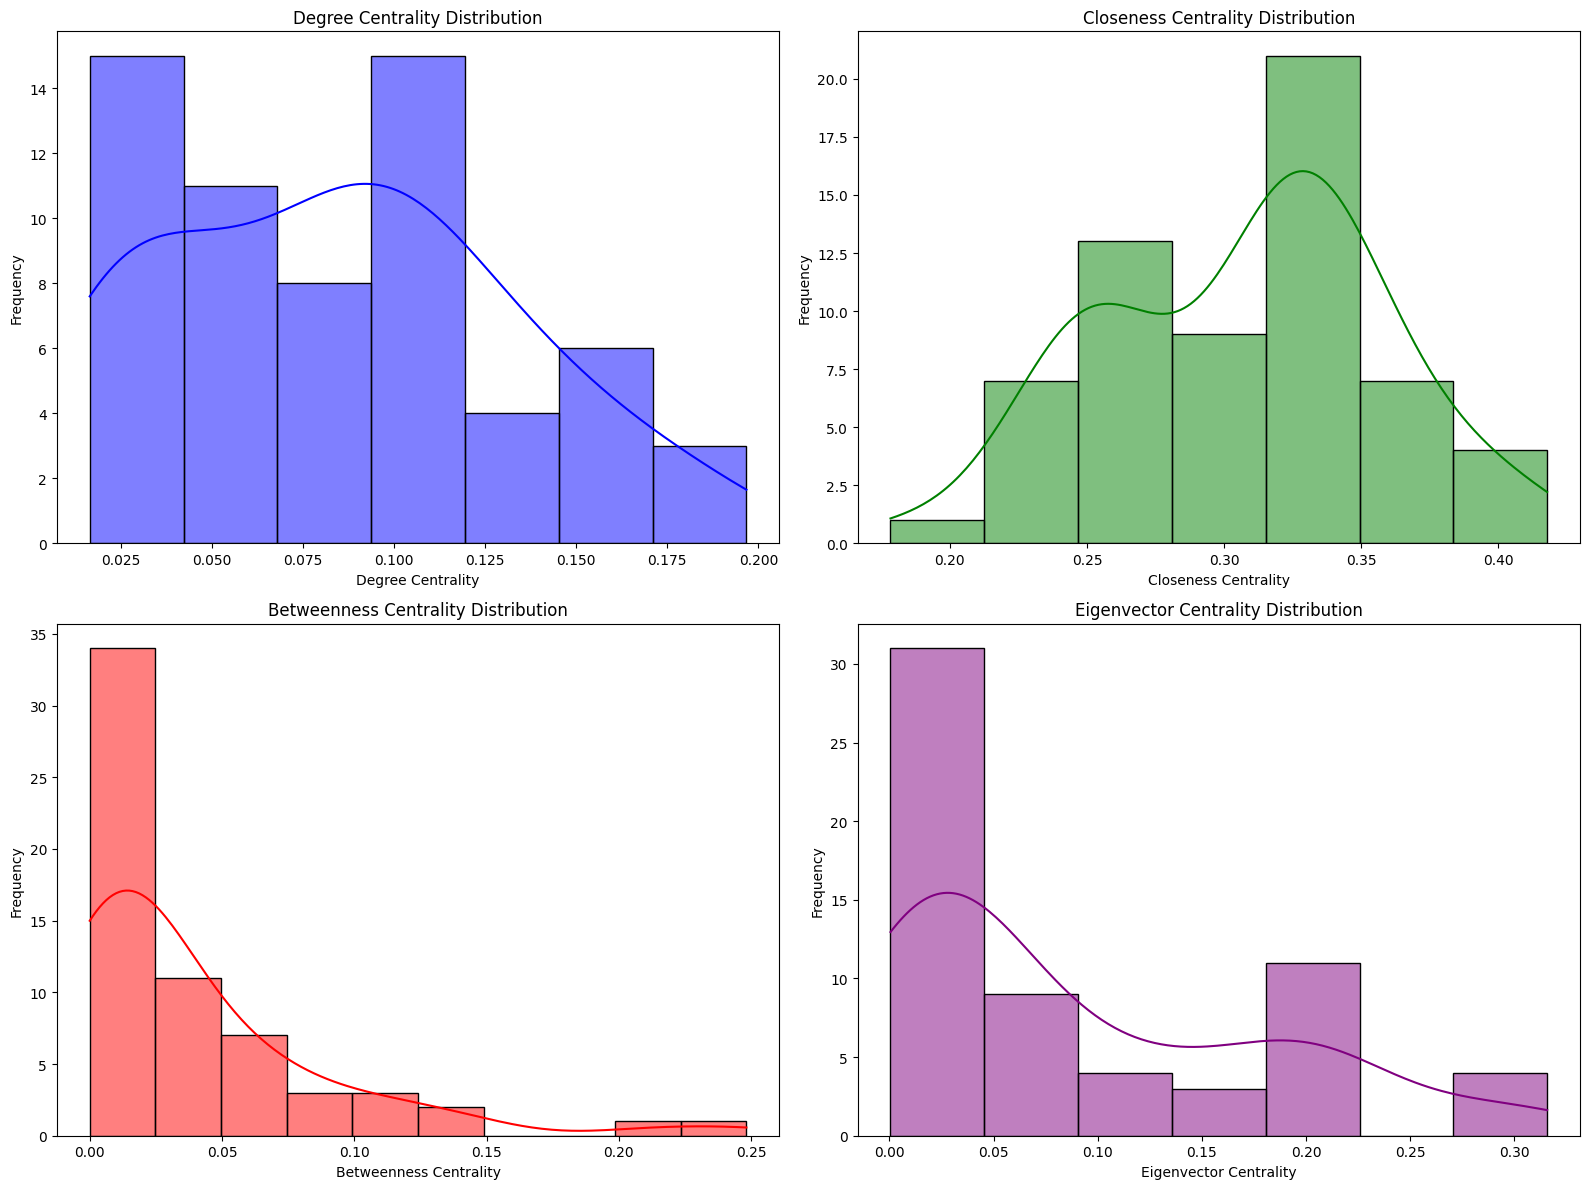

In [13]:
# Visualizzazione con distplot per ogni tipo di centralità
plt.figure(figsize=(16, 12))

# Degree Centrality Distplot
plt.subplot(2, 2, 1)
sns.histplot(degree_sorted['Degree Centrality'], kde=True, color='blue')
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")

# Closeness Centrality Distplot
plt.subplot(2, 2, 2)
sns.histplot(closeness_sorted['Closeness Centrality'], kde=True, color='green')
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")

# Betweenness Centrality Distplot
plt.subplot(2, 2, 3)
sns.histplot(betweenness_sorted['Betweenness Centrality'], kde=True, color='red')
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")

# Eigenvector Centrality Distplot
plt.subplot(2, 2, 4)
sns.histplot(eigenvector_sorted['Eigenvector Centrality'], kde=True, color='purple')
plt.title("Eigenvector Centrality Distribution")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")

# Mostra il grafico
plt.tight_layout()
plt.show()

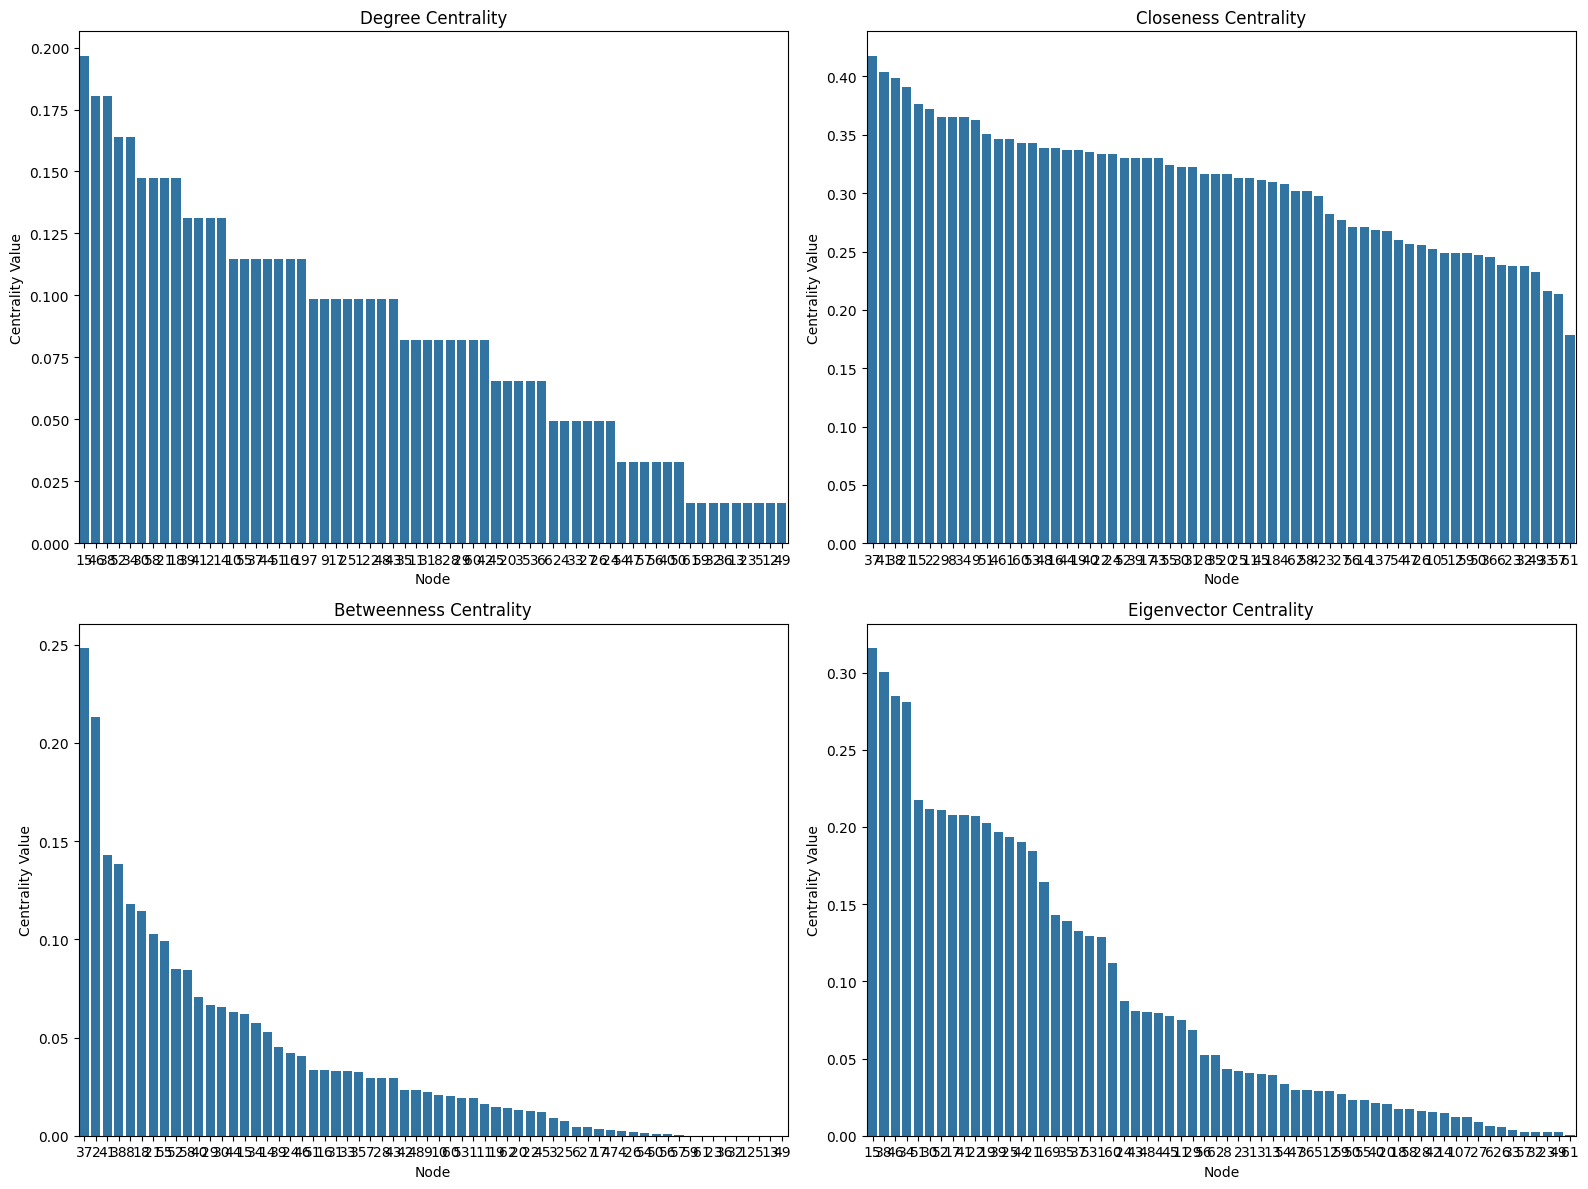

In [14]:

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.barplot(x="Node", y="Degree Centrality", data=degree_sorted)
plt.title("Degree Centrality")
plt.xlabel("Node")
plt.ylabel("Centrality Value")


plt.subplot(2, 2, 2)
sns.barplot(x="Node", y="Closeness Centrality", data=closeness_sorted)
plt.title("Closeness Centrality")
plt.xlabel("Node")
plt.ylabel("Centrality Value")


plt.subplot(2, 2, 3)
sns.barplot(x="Node", y="Betweenness Centrality", data=betweenness_sorted)
plt.title("Betweenness Centrality")
plt.xlabel("Node")
plt.ylabel("Centrality Value")


plt.subplot(2, 2, 4)
sns.barplot(x="Node", y="Eigenvector Centrality", data=eigenvector_sorted)
plt.title("Eigenvector Centrality")
plt.xlabel("Node")
plt.ylabel("Centrality Value")

plt.tight_layout()
plt.show()


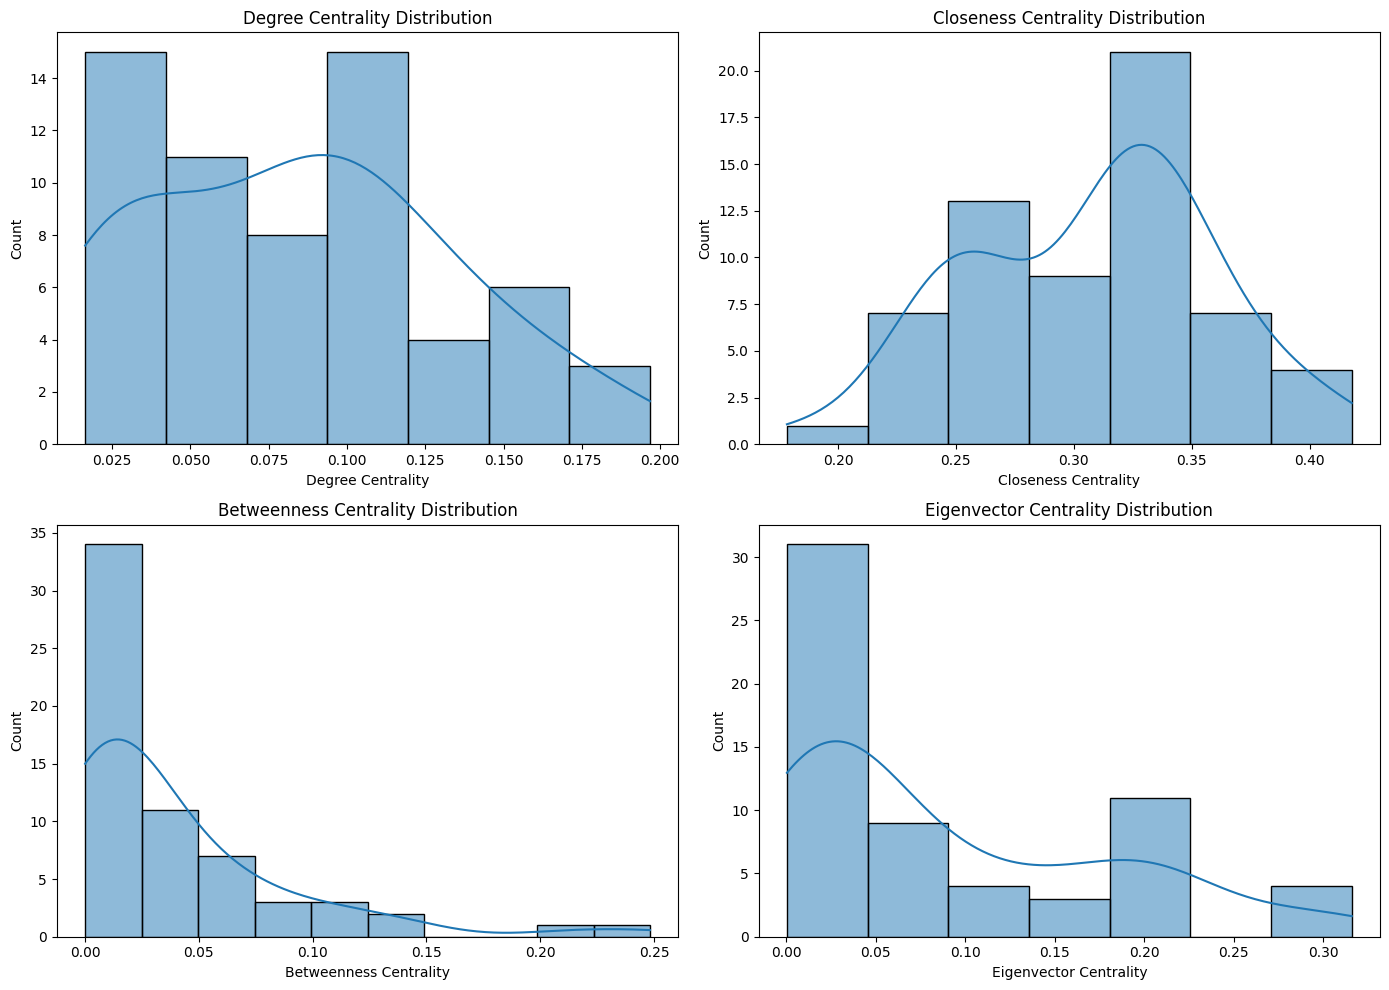

In [15]:

plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.histplot(centrality_df["Degree Centrality"], kde=True)
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Count")


plt.subplot(2, 2, 2)
sns.histplot(centrality_df["Closeness Centrality"], kde=True)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Count")


plt.subplot(2, 2, 3)
sns.histplot(centrality_df["Betweenness Centrality"], kde=True)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Count")


plt.subplot(2, 2, 4)
sns.histplot(centrality_df["Eigenvector Centrality"], kde=True)
plt.title("Eigenvector Centrality Distribution")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


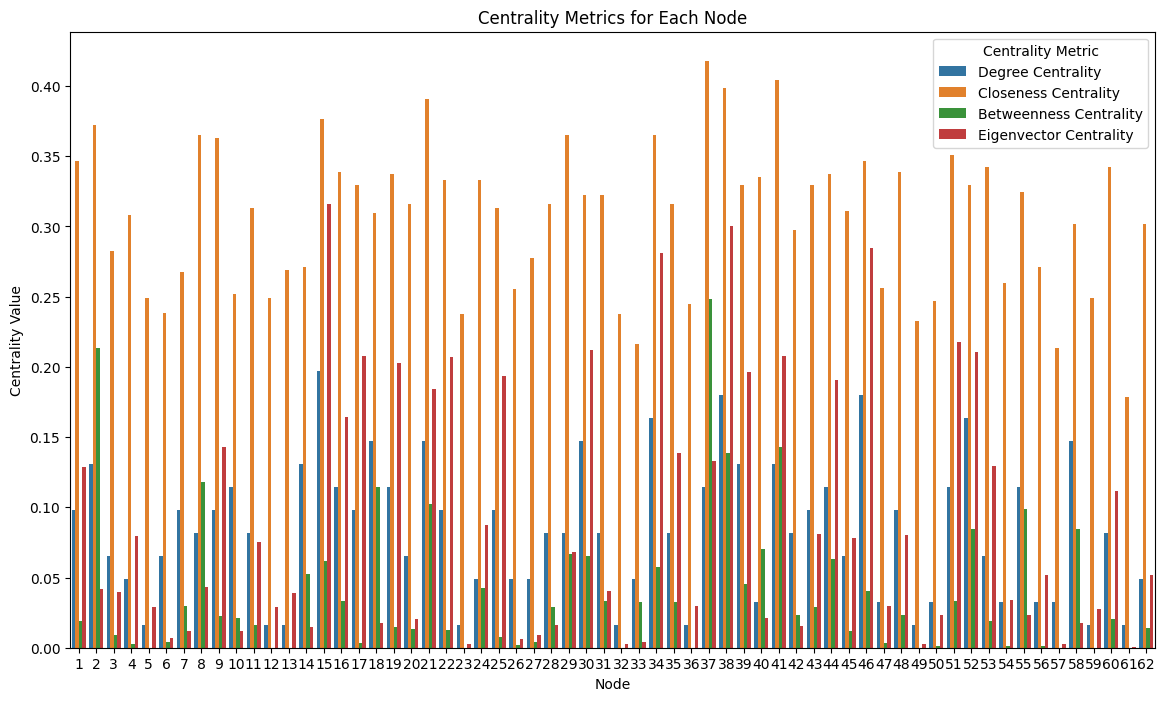

In [16]:
plt.figure(figsize=(14, 8))
sns.barplot(data=pd.melt(centrality_df, id_vars="Node", var_name="Centrality Metric", value_name="Value"), 
            x="Node", y="Value", hue="Centrality Metric")
plt.title("Centrality Metrics for Each Node")
plt.xlabel("Node")
plt.ylabel("Centrality Value")
plt.legend(title="Centrality Metric")
plt.show()

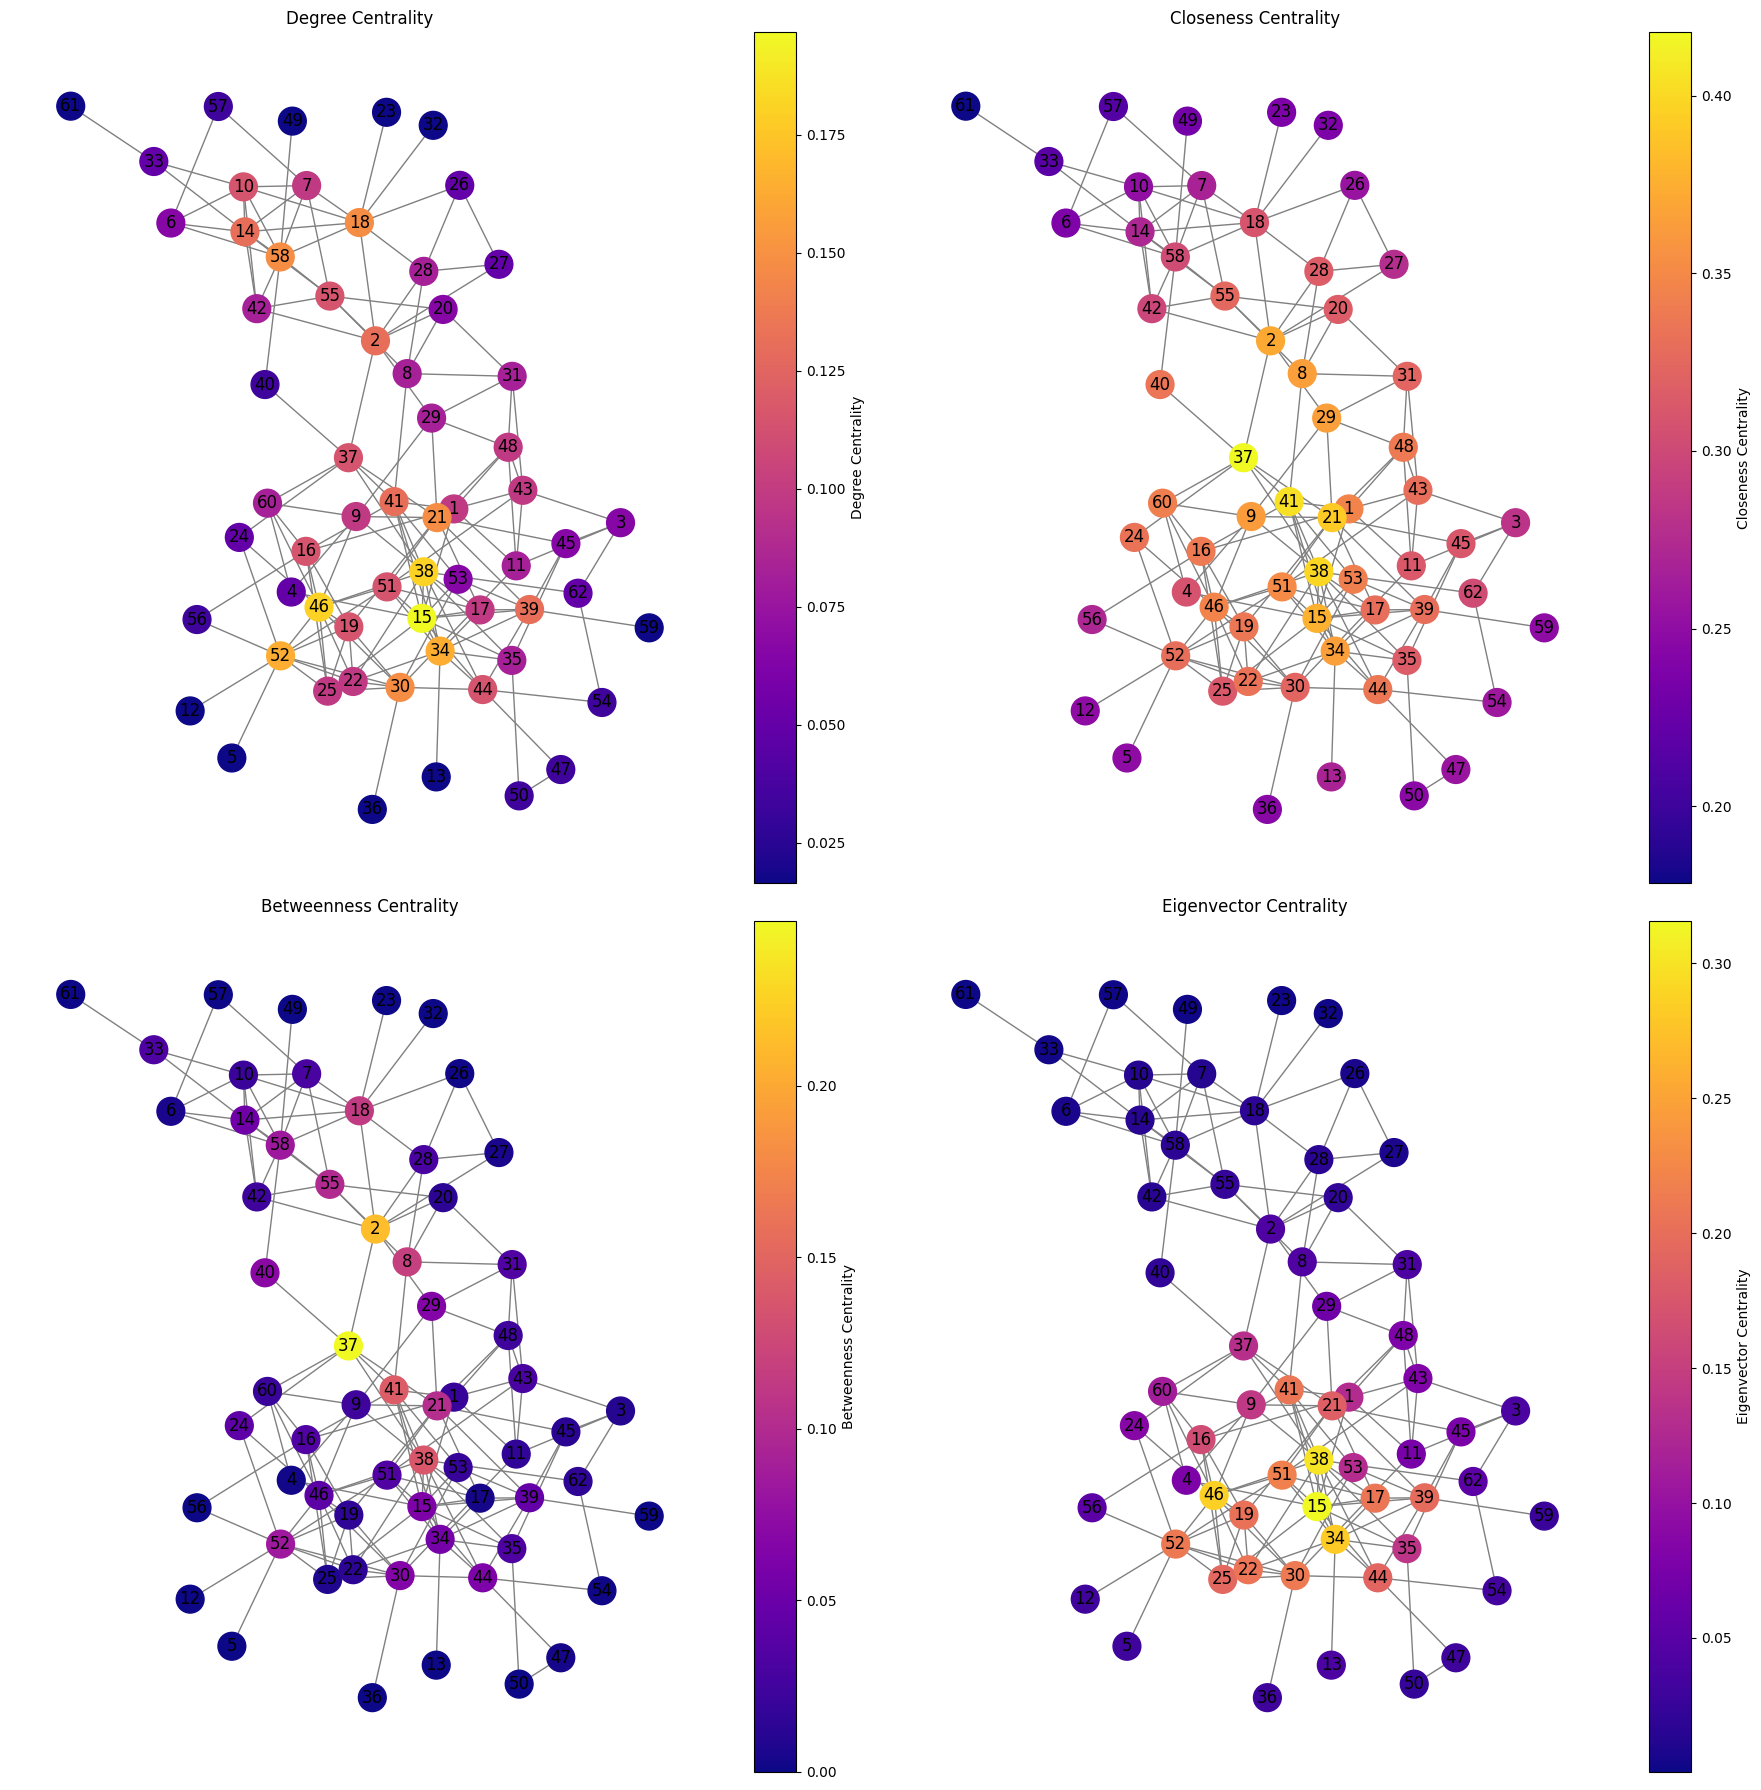

In [17]:
plt.figure(figsize=(18, 18))

node_size = 400


plt.subplot(2, 2, 1)
node_color = [degree_centrality[node] for node in G.nodes]
nx.draw(G, pos, node_color=node_color, node_size=node_size, with_labels=True, cmap='plasma', edge_color="gray")
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Degree Centrality")
plt.title("Degree Centrality")

plt.subplot(2, 2, 2)
node_color = [closeness_centrality[node] for node in G.nodes]
nx.draw(G, pos, node_color=node_color, node_size=node_size, with_labels=True, cmap='plasma', edge_color="gray")
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Closeness Centrality")
plt.title("Closeness Centrality")

plt.subplot(2, 2, 3)
node_color = [betweenness_centrality[node] for node in G.nodes]
nx.draw(G, pos, node_color=node_color, node_size=node_size, with_labels=True, cmap='plasma', edge_color="gray")
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Betweenness Centrality")
plt.title("Betweenness Centrality")


plt.subplot(2, 2, 4)
node_color = [eigenvector_centrality[node] for node in G.nodes]
nx.draw(G, pos, node_color=node_color, node_size=node_size, with_labels=True, cmap='plasma', edge_color="gray")
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Eigenvector Centrality")
plt.title("Eigenvector Centrality")

plt.tight_layout()
plt.show()


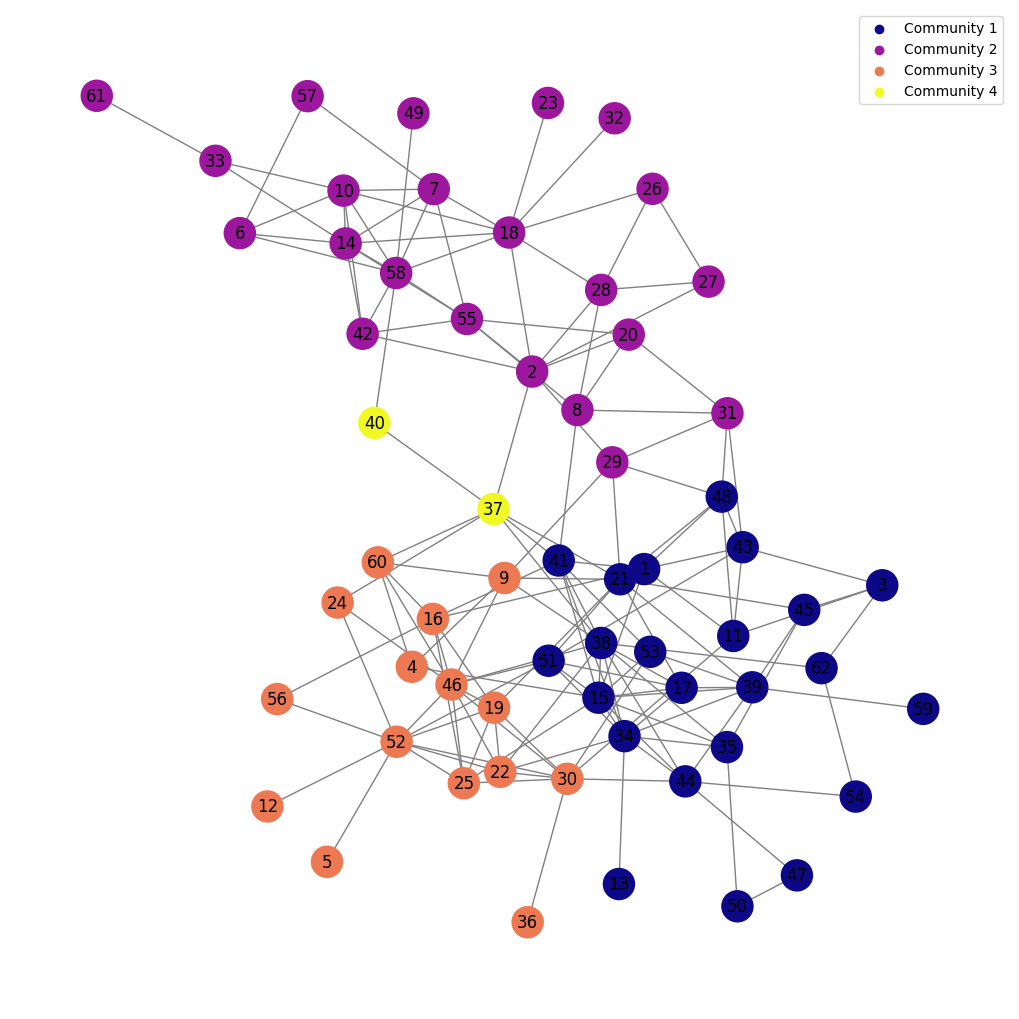

In [18]:
communities = list(greedy_modularity_communities(G))

community_colors = plt.cm.plasma(np.linspace(0, 1, len(communities)))
node_color = {}

for i, community in enumerate(communities):
    for node in community:
        node_color[node] = community_colors[i]


colors = [node_color[node] for node in G.nodes]


plt.figure(figsize=(10, 10))

nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500, edge_color="gray")


for i, community in enumerate(communities):
    plt.scatter([], [], color=community_colors[i], label=f'Community {i+1}')

plt.legend()

plt.show()


## ANALISI DELLE STRUTTURE

In [19]:

cliques = list(nx.find_cliques(G))

triadic_closures = nx.triangles(G)


k_core_dict = {}
for k in range(1, max(dict(G.degree()).values()) + 1):
    k_core = nx.k_core(G, k=k)
    if k_core.number_of_nodes() > 0:
        k_core_dict[k] = k_core


clique_count = len(cliques)
triadic_closures_count = sum(triadic_closures.values()) // 3  # ogni triangolo viene contato tre volte
k_core_summary = {k: len(core.nodes) for k, core in k_core_dict.items()}

print('clique: ', clique_count)
print('triadic_closures: ', triadic_closures_count) 
print('k_core: ', k_core_summary) 


clique:  84
triadic_closures:  95
k_core:  {1: 62, 2: 53, 3: 45, 4: 36}


In [20]:

max_clique_size = max(len(clique) for clique in cliques)
largest_cliques = [clique for clique in cliques if len(clique) == max_clique_size]


max_k = max(k_core_dict.keys())
largest_k_core = k_core_dict[max_k]

ego_node = 19 # Sostituisci con l'id di un nodo
ego_network = nx.ego_graph(G, ego_node)  


print("Largest cliques:",largest_cliques)
print("Max k:", max_k)
print("Nodi nel largest k core:",list(largest_k_core.nodes))
print("Ego-network del nodo:", ego_node, ":", ego_network)


Largest cliques: [[7, 14, 58, 10, 18], [19, 46, 52, 30, 25], [19, 46, 52, 30, 22]]
Max k: 4
Nodi nel largest k core: [11, 1, 15, 16, 41, 43, 48, 18, 2, 20, 29, 37, 42, 55, 9, 60, 52, 10, 14, 58, 7, 8, 31, 21, 38, 46, 30, 34, 17, 25, 39, 44, 51, 53, 19, 22]
Ego-network del nodo: 19 : Graph with 8 nodes and 18 edges


Closed triads (triangles): 95
Connected triples: 923
Open triads: 828
Triadi chiuse che contengono 38 e 15:
  [38, 15, 41]
  [38, 15, 34]
  [38, 15, 17]
  [38, 15, 35]
  [38, 15, 44]

Triadi aperte che contengono 38 e 15:
  [38, 15, 1]
  [38, 15, 37]
  [38, 15, 62]
  [38, 15, 9]
  [38, 15, 4]
  [38, 15, 46]
  [38, 15, 25]
  [38, 15, 39]
  [38, 15, 51]
  [38, 15, 53]
  [38, 15, 22]


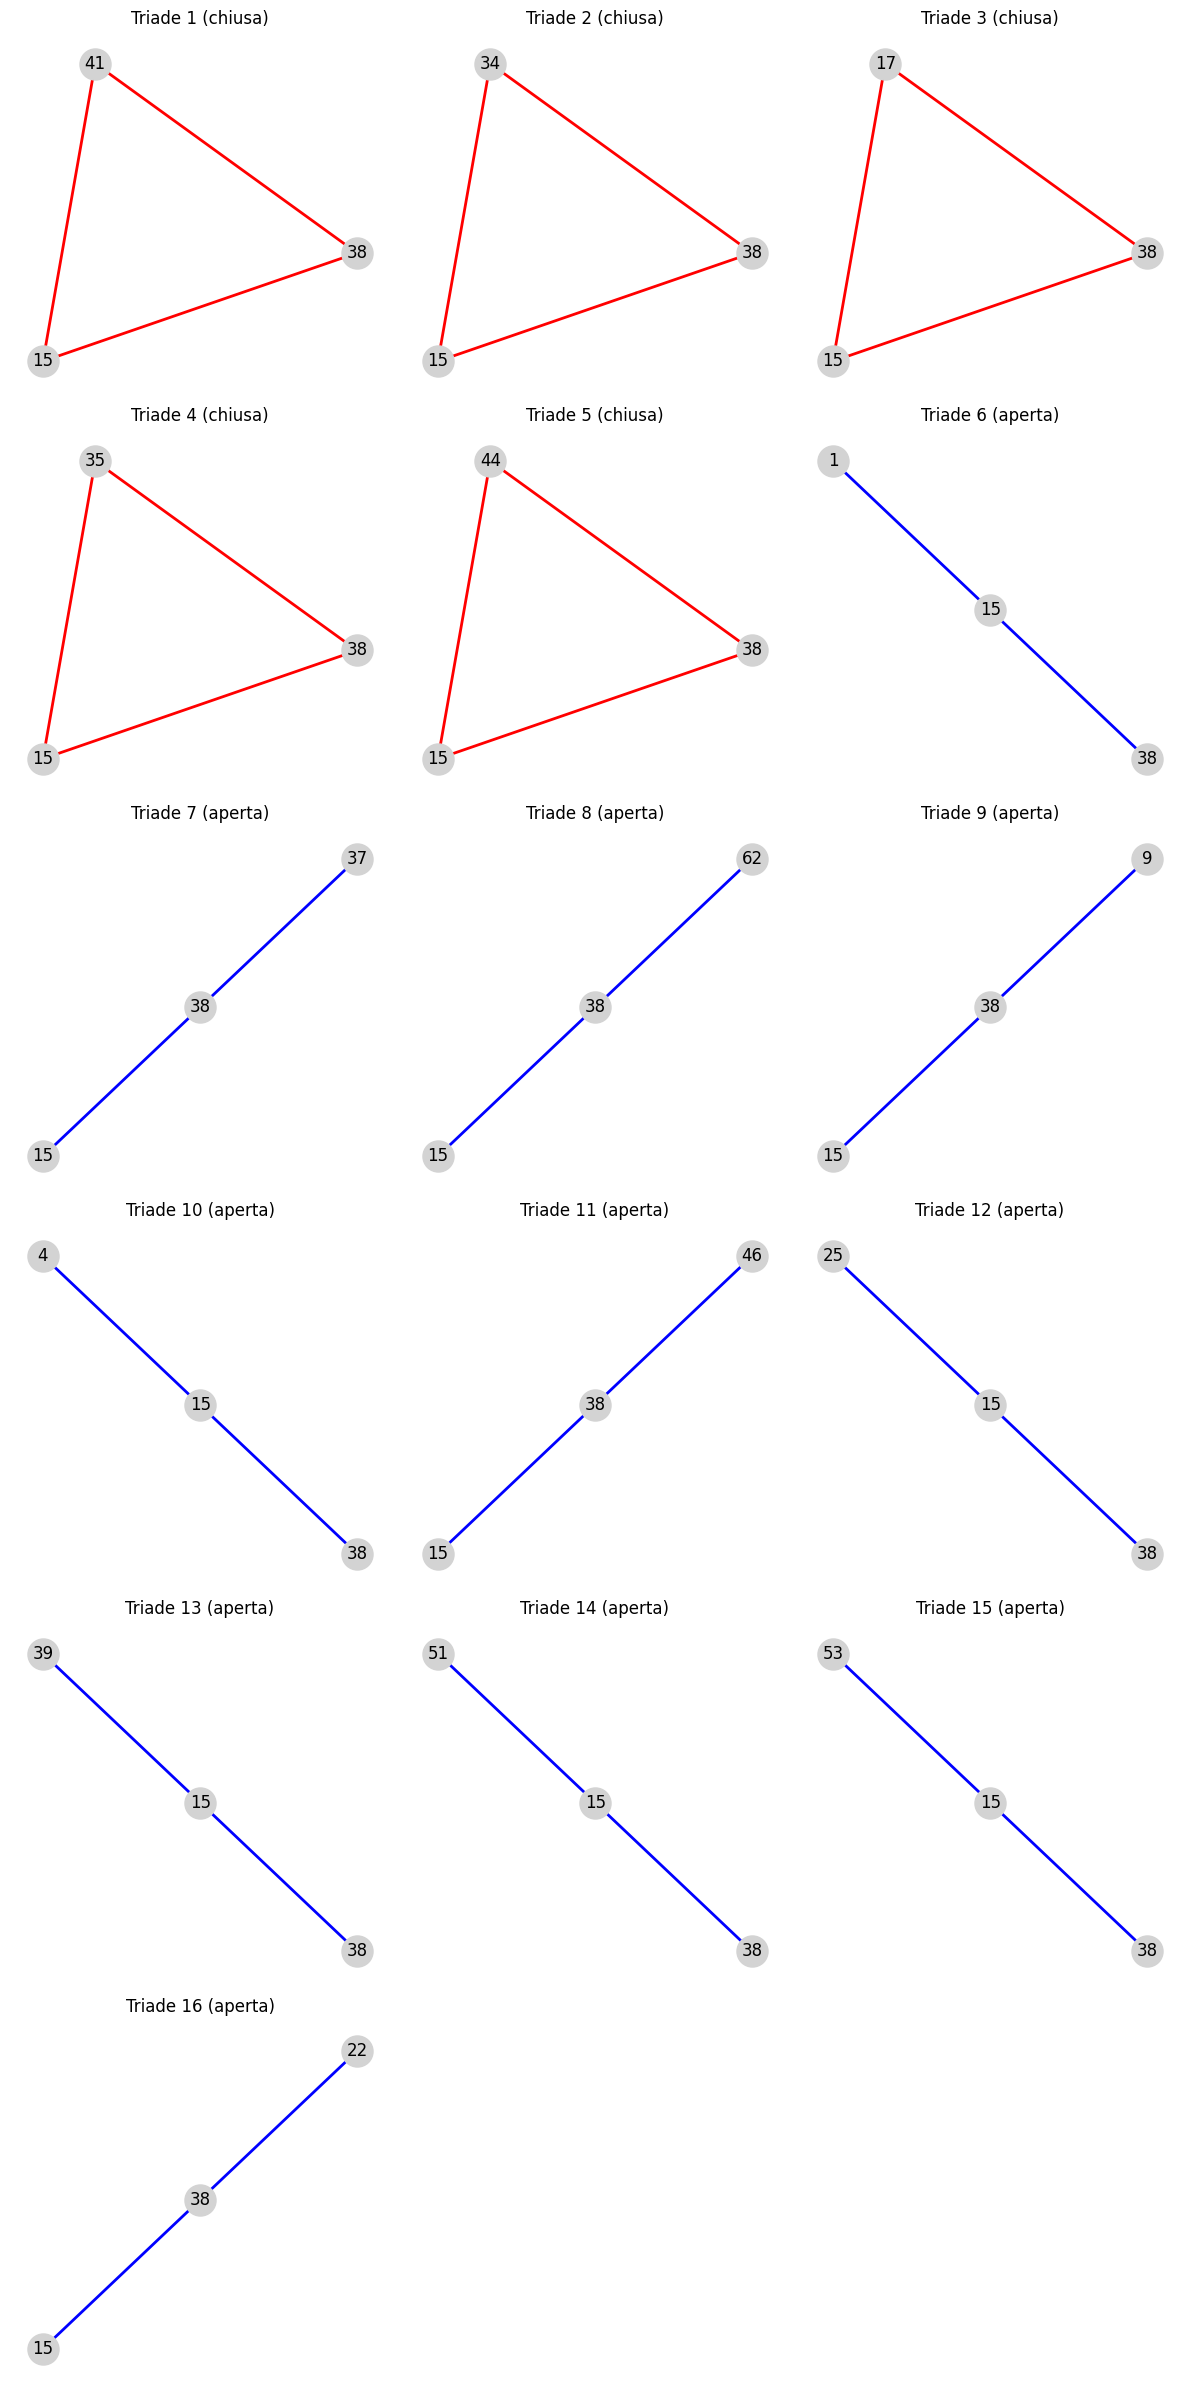

In [ ]:
triangles_per_node = nx.triangles(G)

# conteggio globale
total_closed_triads = sum(triangles_per_node.values()) / 3
# numero di "connected triples": somma per ogni nodo di (deg(v) choose 2)
connected_triples = sum(d * (d - 1) / 2 for _, d in G.degree())
total_open_triads = connected_triples - total_closed_triads

print(f"Closed triads (triangles): {total_closed_triads:.0f}")
print(f"Connected triples: {connected_triples:.0f}")
print(f"Open triads: {total_open_triads:.0f}")

u, v = 38, 15
if not G.has_node(u) or not G.has_node(v):
    raise ValueError(f"Uno dei nodi {u} o {v} non esiste nel grafo!")

closed_triads = []  # triangoli completi: 3 archi
open_triads   = []  # triadi aperte: esattamente 2 archi

for x in G.nodes():
    if x in (u, v):
        continue

    trio = [u, v, x]
    subG = G.subgraph(trio)
    e = subG.number_of_edges()

    if e == 3:
        closed_triads.append(trio)
    elif e == 2:
        open_triads.append(trio)

print("Triadi chiuse che contengono 38 e 15:")
for tri in closed_triads:
    print(f"  {tri}")

print("\nTriadi aperte che contengono 38 e 15:")
for tri in open_triads:
    print(f"  {tri}")

all_triads = closed_triads + open_triads
n = len(all_triads)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(4*cols, 4*rows))

for i, tri in enumerate(all_triads, start=1):
    H = G.subgraph(tri)
    pos = nx.spring_layout(H, seed=42)
    plt.subplot(rows, cols, i)
    # color degli archi: rosso per chiuse, blu per aperte
    color = 'red' if tri in closed_triads else 'blue'
    nx.draw(
        H, pos,
        with_labels=True,
        node_size=500,
        node_color='lightgray',
        edge_color=color,
        width=2
    )
    kind = 'chiusa' if tri in closed_triads else 'aperta'
    plt.title(f'Triade {i} ({kind})')
    plt.axis('off')

plt.tight_layout()
plt.show()

Triadi chiuse che contengono 37 e 15:

Triadi aperte che contengono 37 e 15:
  [37, 15, 41]
  [37, 15, 38]


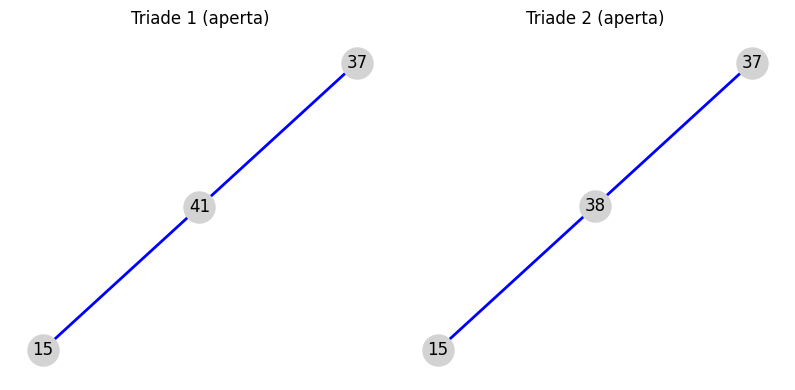

In [ ]:
u, v = 37, 15
if not G.has_node(u) or not G.has_node(v):
    raise ValueError(f"Uno dei nodi {u} o {v} non esiste nel grafo!")

closed_triads = []  # triangoli completi: 3 archi
open_triads   = []  # triadi aperte: esattamente 2 archi

for x in G.nodes():
    if x in (u, v):
        continue

    trio = [u, v, x]
    subG = G.subgraph(trio)
    e = subG.number_of_edges()

    if e == 3:
        closed_triads.append(trio)
    elif e == 2:
        open_triads.append(trio)

print("Triadi chiuse che contengono 37 e 15:")
for tri in closed_triads:
    print(f"  {tri}")

print("\nTriadi aperte che contengono 37 e 15:")
for tri in open_triads:
    print(f"  {tri}")

all_triads = closed_triads + open_triads
n = len(all_triads)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(4*cols, 4*rows))

for i, tri in enumerate(all_triads, start=1):
    H = G.subgraph(tri)
    pos = nx.spring_layout(H, seed=42)
    plt.subplot(rows, cols, i)
    # color degli archi: rosso per chiuse, blu per aperte
    color = 'red' if tri in closed_triads else 'blue'
    nx.draw(
        H, pos,
        with_labels=True,
        node_size=500,
        node_color='lightgray',
        edge_color=color,
        width=2
    )
    kind = 'chiusa' if tri in closed_triads else 'aperta'
    plt.title(f'Triade {i} ({kind})')
    plt.axis('off')

plt.tight_layout()
plt.show()

da notare che 41 e 38 fanno da intermediari tra due nodi molto influenti

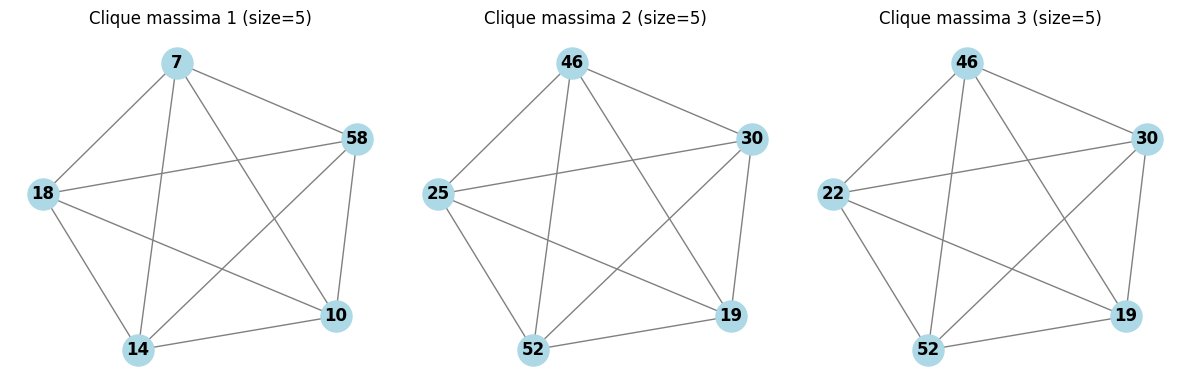

In [ ]:
all_cliques = list(nx.find_cliques(G))
max_size    = max(len(c) for c in all_cliques)
max_cliques = [c for c in all_cliques if len(c) == max_size]

fig, axes = plt.subplots(1, len(max_cliques), figsize=(12, 4))

for i, clique in enumerate(max_cliques):
    H = G.subgraph(clique)
    pos = nx.spring_layout(H, seed=42)  # layout fisso per coerenza
    nx.draw(
        H, pos,
        with_labels=True,
        node_size=500,
        node_color='lightblue',
        edge_color='gray',
        font_weight='bold',
        ax=axes[i]
    )
    axes[i].set_title(f'Clique massima {i+1} (size={max_size})')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

C:\Users\alep9\AppData\Local\Temp\ipykernel_10448\3591812638.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Core number massimo: 4
Nodi nel 4-core: [11, 1, 15, 16, 41, 43, 48, 18, 2, 20, 29, 37, 42, 55, 9, 60, 52, 10, 14, 58, 7, 8, 31, 21, 38, 46, 30, 34, 17, 25, 39, 44, 51, 53, 19, 22]


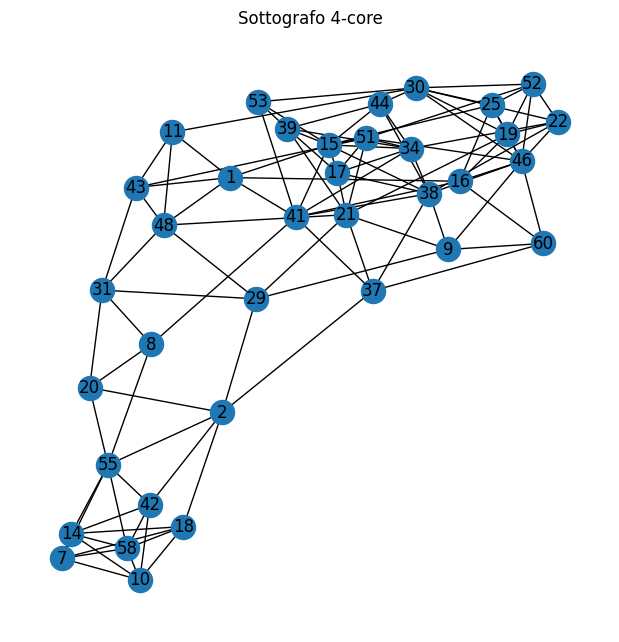

In [ ]:

core_numbers = nx.core_number(G)
max_core = max(core_numbers.values())
G_kcore = nx.k_core(G, k=max_core)

print(f"Core number massimo: {max_core}")
print(f"Nodi nel {max_core}-core: {list(G_kcore.nodes())}")

pos = nx.spring_layout(G_kcore, seed=42)
plt.figure(figsize=(6, 6))
nx.draw(G_kcore, pos, with_labels=True)
plt.title(f'Sottografo {max_core}-core')
plt.axis('off')
plt.tight_layout()
plt.show()


Ego network di 15: 13 nodi, 29 archi
Ego network di 38: 12 nodi, 24 archi
Ego network di 46: 12 nodi, 28 archi


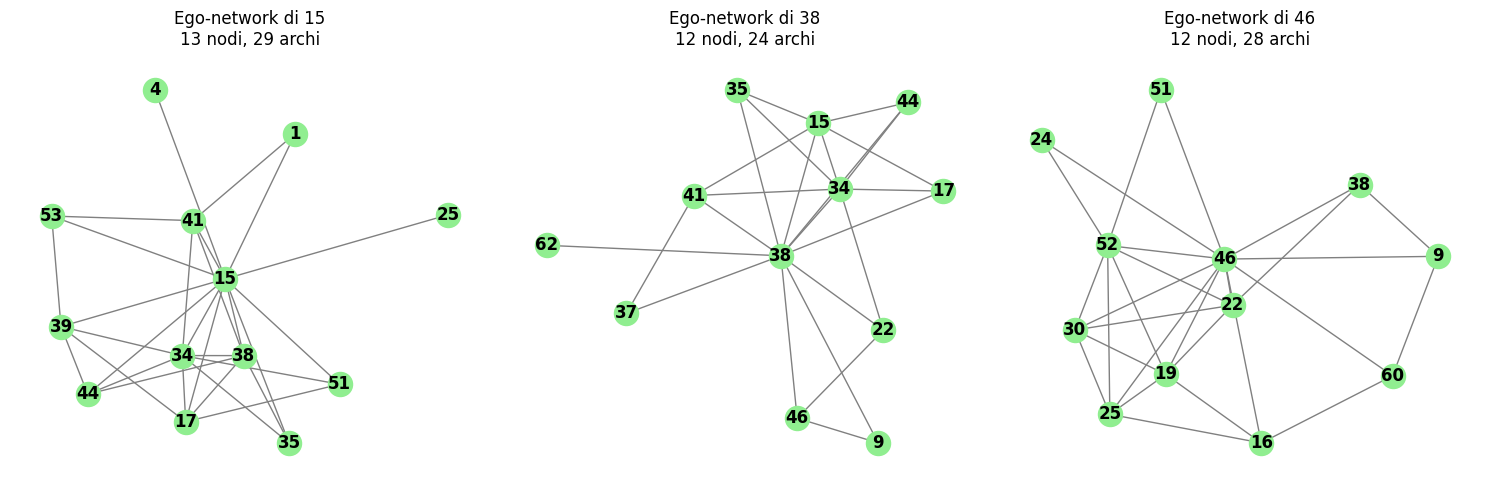

In [ ]:
degree_centrality = nx.degree_centrality(G)
top3 = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:3]
for n in top3:
    ego = nx.ego_graph(G, n)
    print(f"Ego network di {n}: {ego.number_of_nodes()} nodi, {ego.number_of_edges()} archi")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, n in zip(axes, top3):
    ego = nx.ego_graph(G, n)
    pos = nx.spring_layout(ego, seed=42)  # layout coerente
    nx.draw(
        ego, pos,
        with_labels=True,
        node_size=300,
        node_color='lightgreen',
        edge_color='gray',
        font_weight='bold',
        ax=ax
    )
    ax.set_title(f'Ego‐network di {n}\n'
                 f'{ego.number_of_nodes()} nodi, {ego.number_of_edges()} archi')
    ax.axis('off')

plt.tight_layout()
plt.show()